In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# BT2101 HW2 Notebook

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
from math import sqrt
%matplotlib inline

In [3]:
# Import dataset into Python Pandas DataFrame
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
#Getting list of column headers
features_list = df.columns.tolist()
print(features_list)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
#Checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 1. Data Manipulation

### 1.1 Cleaning up the data

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Correct the data type of TotalCharges
#Total Charges is left blank for customers who have stayed with the company for
#less than 1 month, tenure = 0
df['TotalCharges'] = df['TotalCharges'].replace(' ',0) #replacing spaces with 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [8]:
#Using number of unique values to differentiate categorical variables from numerical variables
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
#List of different types of features
id_list = ['customerID',]
target_list = ['Churn',]
num_list = [col for col in df.columns if df[col].nunique()>4 and col not in id_list]
cat_list = [col for col in df.columns if df[col].nunique()<=4 and col not in target_list]

In [10]:
#Checking for columns that should be binary but have >2 unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
#Replace 'No internet service' with 'No'
for i in ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']:
    df[i] = df[i].replace({'No internet service': 'No'})

In [12]:
#Checking that categorical columns with >2 unique values are not binary variables
print(df['MultipleLines'].unique())
print(df['InternetService'].unique())
print(df['PaymentMethod'].unique())

['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [13]:
#Replace 'No phone service' with 'No'
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

In [14]:
#Creating list of binary features
b_list = [col for col in cat_list if df[col].nunique()==2]

## 2. Exploratory Data Analysis

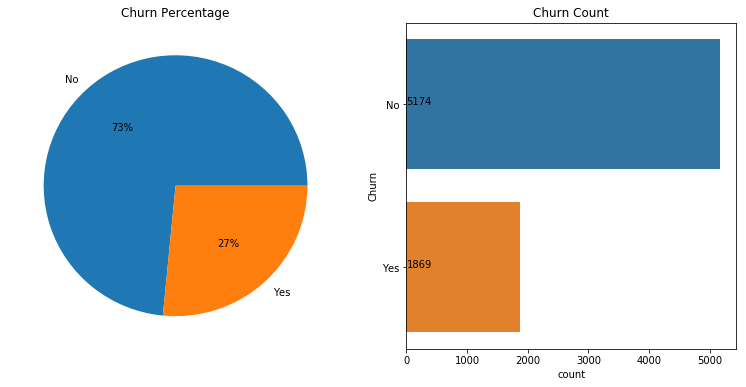

In [15]:
# Overall Churn
plt.figure(figsize=(13,6))

plt.subplot(1,2,1) #nrows, ncols, index
df['Churn'].value_counts().plot.pie(autopct  = "%1.0f%%")
plt.title('Churn Percentage')
plt.ylabel("")

plt.subplot(1,2,2)
ax = sns.countplot(y = df['Churn'])
for i,j in enumerate(df['Churn'].value_counts().values): ax.text(.1,i,j)
plt.title('Churn Count')

plt.show()

### 2.1 EDA For Categorical Variables

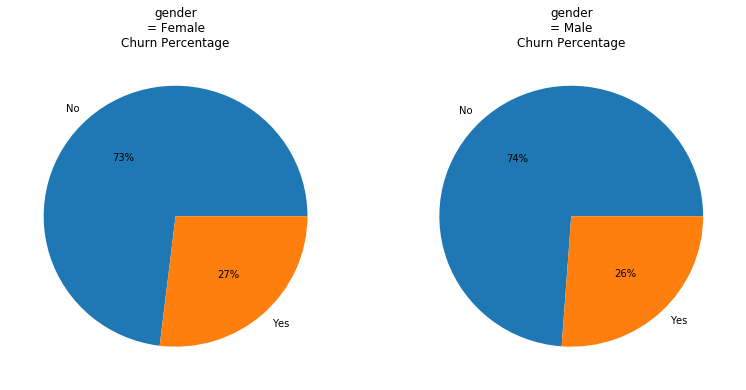

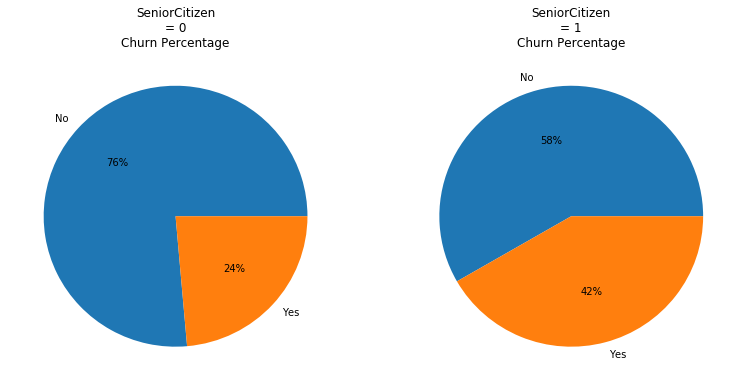

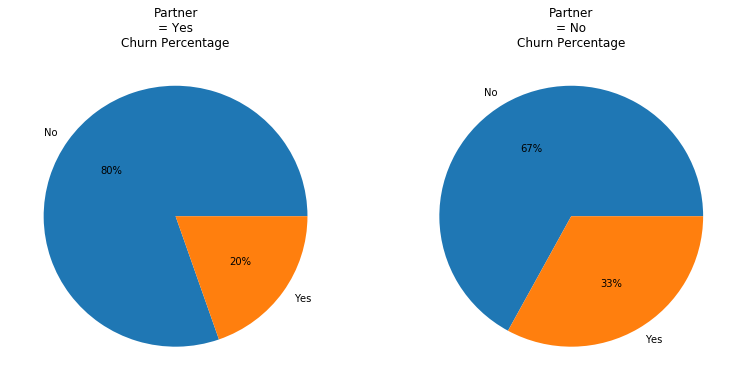

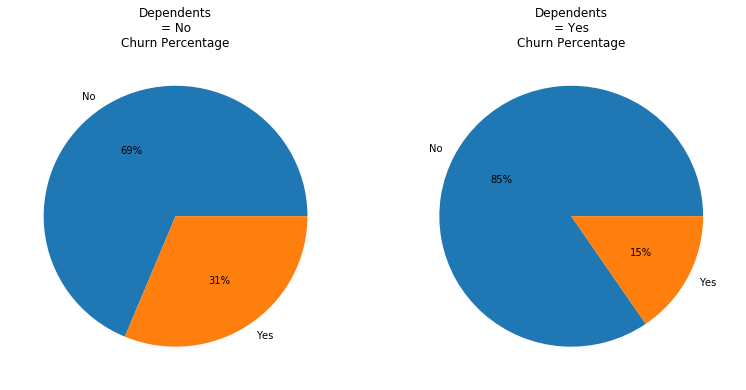

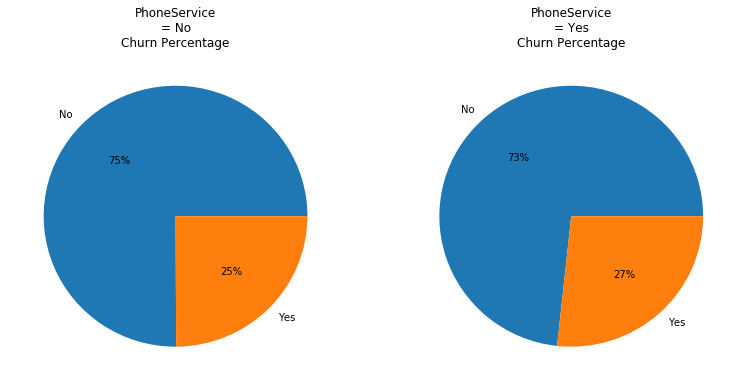

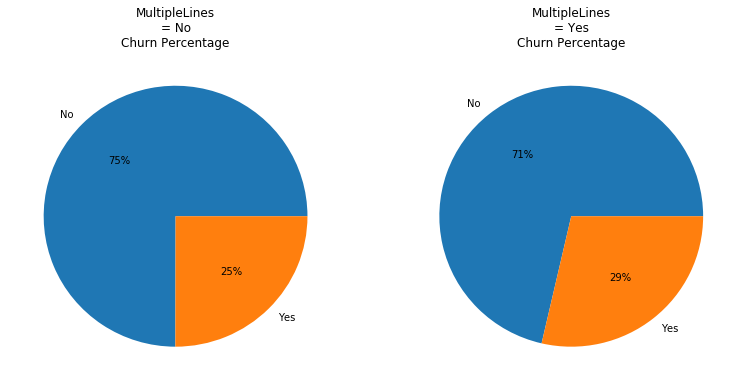

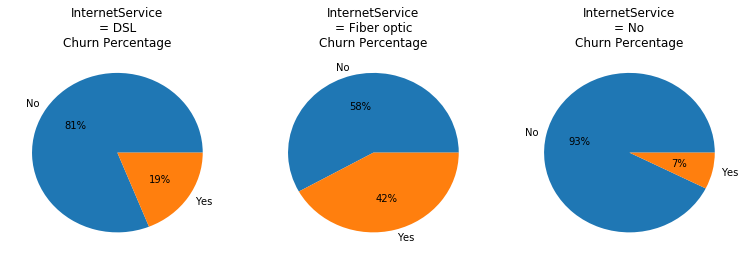

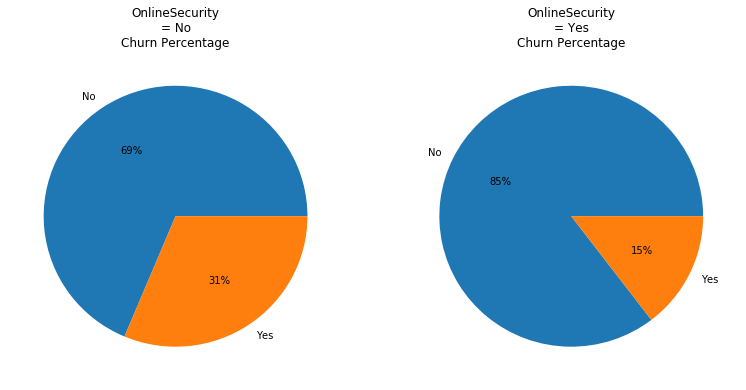

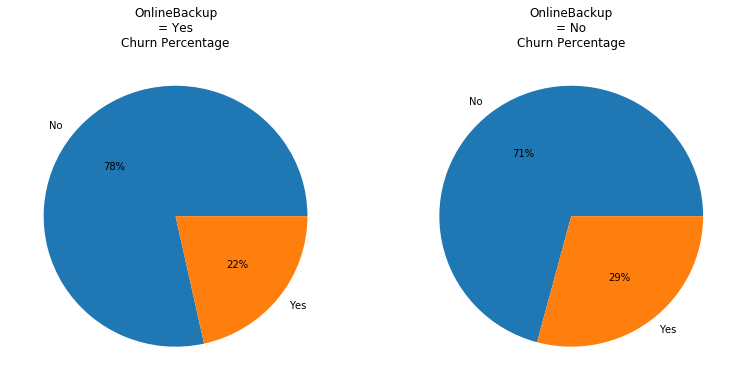

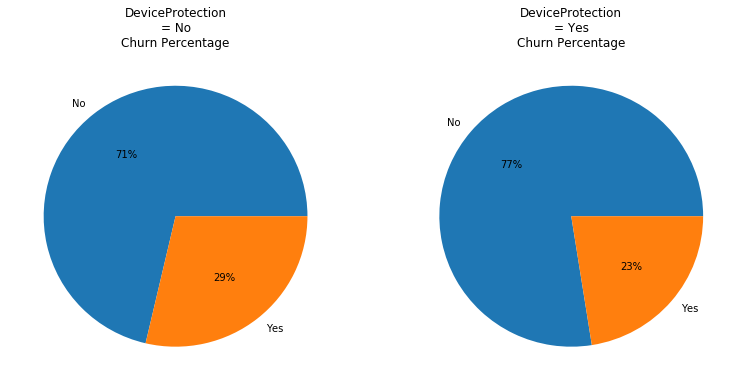

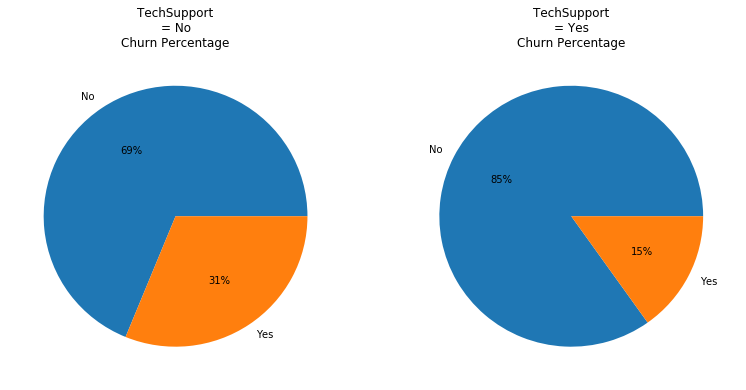

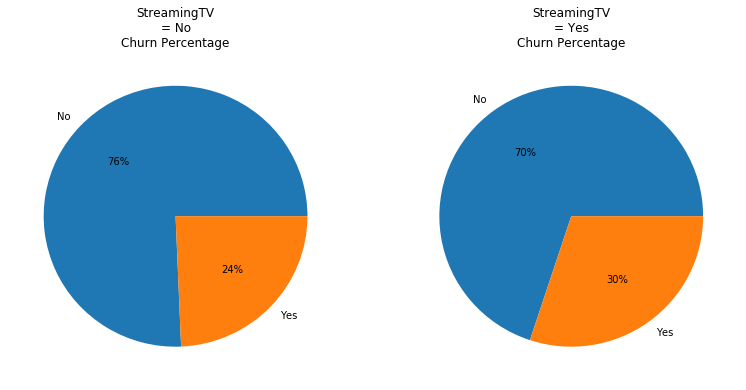

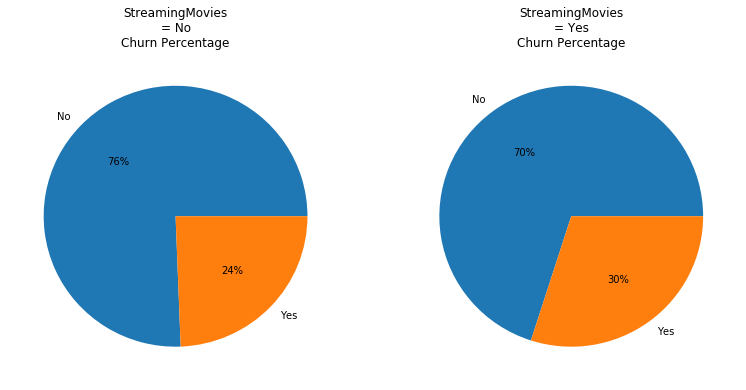

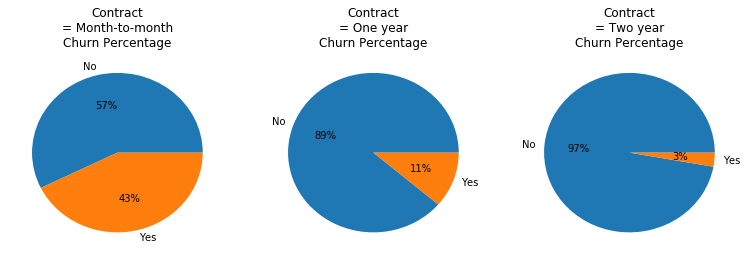

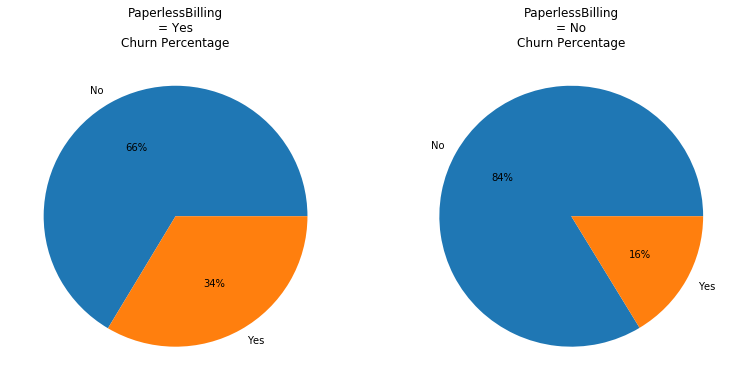

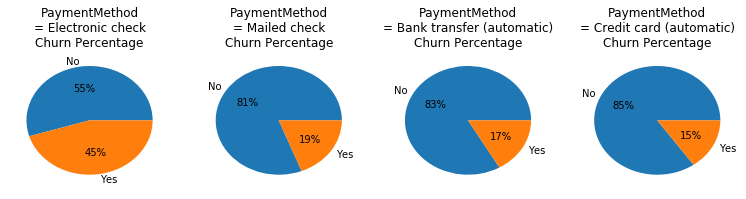

In [16]:
#Churn for each categorical variable
def plot_pie(indep_col_list, dep_col_list):
    for x in indep_col_list:
        ncols = df[x].nunique()
        for y in dep_col_list:
            plt.figure(figsize=(13,(14-ncols)/ncols)) #making sure the circles are not ovals
            index = 1
            for val in df[x].unique():
                df_subset = df[df[x]==val]
                
                plt.subplot(1,ncols,index)
                df_subset[y].value_counts().plot.pie(autopct  = "%1.0f%%")
                plt.title(x +'\n= '+ str(val) +'\n'+ y + ' Percentage')
                plt.ylabel("")
                index += 1
            plt.show()
           
plot_pie(cat_list, target_list)

### 2.2 EDA for Numerical Variables

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


First few entries of freq_table for tenure 

Churn    No  Yes  Total  ChurnPercentage
tenure                                  
0        11    0     11         0.000000
1       233  380    613         0.619902
2       115  123    238         0.516807
3       106   94    200         0.470000
4        93   83    176         0.471591


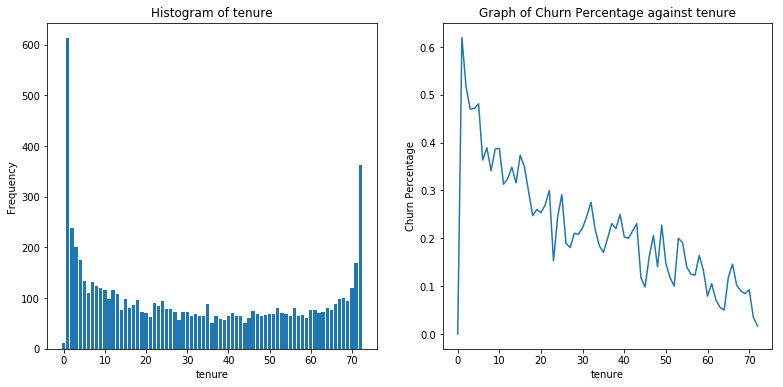

First few entries of freq_table for MonthlyCharges 

Churn           No  Yes  Total  ChurnPercentage
MonthlyCharges                                 
18.25            1    0      1              0.0
18.40            1    0      1              0.0
18.55            1    0      1              0.0
18.70            2    0      2              0.0
18.75            1    0      1              0.0


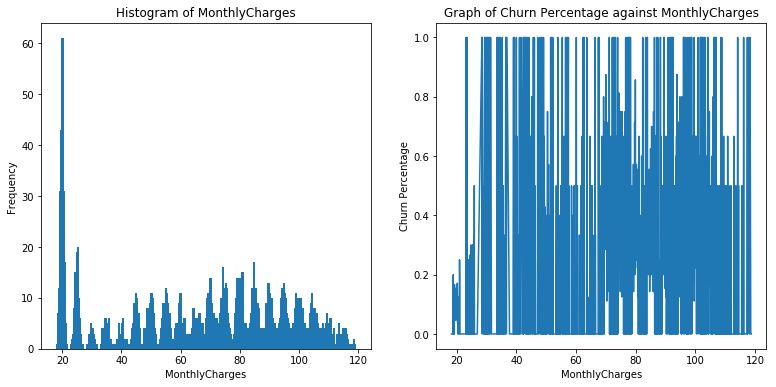

First few entries of freq_table for TotalCharges 

Churn         No  Yes  Total  ChurnPercentage
TotalCharges                                 
0.00          11    0     11              0.0
18.80          1    0      1              0.0
18.85          1    1      2              0.5
18.90          1    0      1              0.0
19.00          1    0      1              0.0


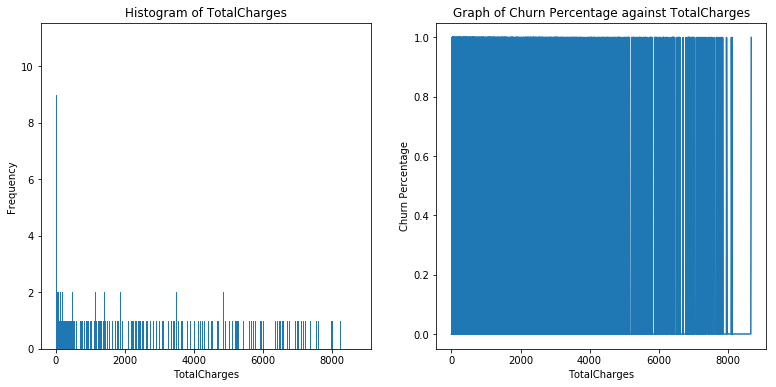

In [18]:
def plot_hist(num_list):
    for x in num_list:
        plt.figure(figsize=(13,6))

        freq_table = pd.crosstab(df[x], df['Churn'])
        freq_table['Total'] = freq_table['No']+freq_table['Yes']
        freq_table['ChurnPercentage'] = freq_table['Yes']/freq_table['Total']
        print('First few entries of freq_table for',x,'\n')
        print(freq_table.head())
        
        plt.subplot(1,2,1)
        plt.bar(freq_table.index, freq_table['Total'])
        plt.title('Histogram of '+x)
        plt.ylabel('Frequency')
        plt.xlabel(x)

        plt.subplot(1,2,2)
        plt.plot(freq_table['ChurnPercentage'])
        plt.title('Graph of Churn Percentage against ' + x)
        plt.ylabel('Churn Percentage')
        plt.xlabel(x)
    
        plt.show()

plot_hist(num_list)

In [19]:
#Group MonthlyCharges and TotalCharges to get better graphs of Churn Percentage
def label_MonthlyCharges(x):
    if x <= 20:
        return '0-20'
    elif x <= 40:
        return '20-40'
    elif x <= 60:
        return '40-60'
    elif x <= 80:
        return '60-80'
    elif x <= 100:
        return '80-100'
    else: return '>100'
    
df['MonthlyCharges_group'] = df['MonthlyCharges'].map(label_MonthlyCharges)

def label_TotalCharges(x):
    min, max = 0, 1000
    while max <= 9000:
        if min <= x and x < max:
            return str(int(min/1000))+'k-'+str(int(max/1000))+'k'
        min+=1000
        max+=1000

df['TotalCharges_group'] = df['TotalCharges'].map(label_TotalCharges)

First few entries of freq_table for MonthlyCharges_group 

Churn                   No  Yes  Total  ChurnPercentage
MonthlyCharges_group                                   
0-20                   598   58    656         0.088415
20-40                 1026  156   1182         0.131980
40-60                  804  276   1080         0.255556
60-80                  986  473   1459         0.324195
80-100                1111  653   1764         0.370181


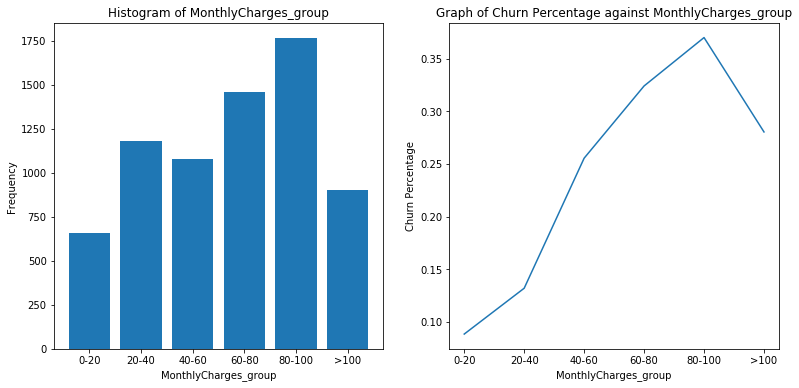

First few entries of freq_table for TotalCharges_group 

Churn                 No   Yes  Total  ChurnPercentage
TotalCharges_group                                    
0k-1k               1834  1070   2904         0.368457
1k-2k               1014   269   1283         0.209665
2k-3k                472   180    652         0.276074
3k-4k                449   107    556         0.192446
4k-5k                427    86    513         0.167641


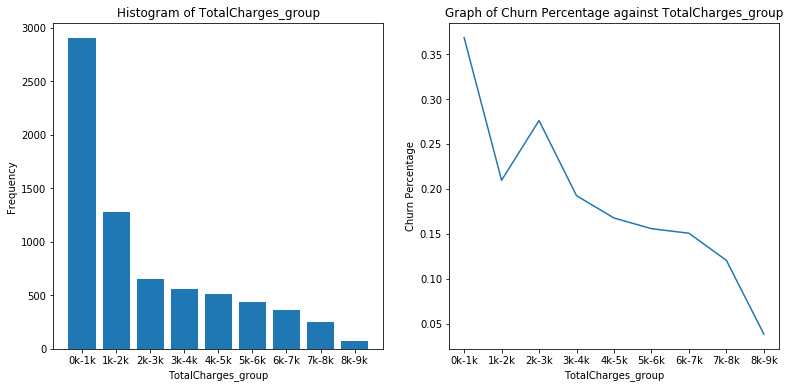

In [20]:
plot_hist(['MonthlyCharges_group', 'TotalCharges_group'])

## 3. Data Pre-Processing

### 3.1 Standardize Numerical Variables

In [21]:
# Load libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scaling Numerical Columns
# Standardize features: Z-index
scaler = MinMaxScaler()
num_std = scaler.fit_transform(df[num_list])
num_std = pd.DataFrame(num_std, columns = num_list)

In [22]:
#Merging scaled numerical data with catergorical data
df_old = df.copy()
df = df.drop(columns = num_list)
df = df.merge(num_std, left_index=True, right_index=True, how='left')

### 3.2 Changing Binary Variables to 0 & 1

In [23]:
#Processing Binary Catergorical Variables
for name in ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', \
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'\
             , 'Churn']:
    df[name] = df[name].map(lambda x: 1 if x=='Yes' else 0)

In [24]:
df.dtypes

customerID               object
gender                   object
SeniorCitizen             int64
Partner                   int64
Dependents                int64
PhoneService              int64
MultipleLines             int64
InternetService          object
OnlineSecurity            int64
OnlineBackup              int64
DeviceProtection          int64
TechSupport               int64
StreamingTV               int64
StreamingMovies           int64
Contract                 object
PaperlessBilling          int64
PaymentMethod            object
Churn                     int64
MonthlyCharges_group     object
TotalCharges_group       object
tenure                  float64
MonthlyCharges          float64
TotalCharges            float64
dtype: object

### 3.3 Dummy Variables for Non Binary Categorical Variables

In [25]:
print(df['gender'].unique())
print(df['InternetService'].unique())
print(df['Contract'].unique())
print(df['PaymentMethod'].unique())

['Female' 'Male']
['DSL' 'Fiber optic' 'No']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [26]:
df['Male'] = df['gender'].map(lambda x: 1 if x=='Male' else 0)
df = df.drop(columns = 'gender')

#Columns with non_binary categorical variables
df = pd.get_dummies(data = df, columns = ['InternetService', 'Contract', 'PaymentMethod'])

In [27]:
df.dtypes

customerID                                  object
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
Churn                                        int64
MonthlyCharges_group                        object
TotalCharges_group                          object
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
Male                           

In [28]:
df.describe()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,...,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,...,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


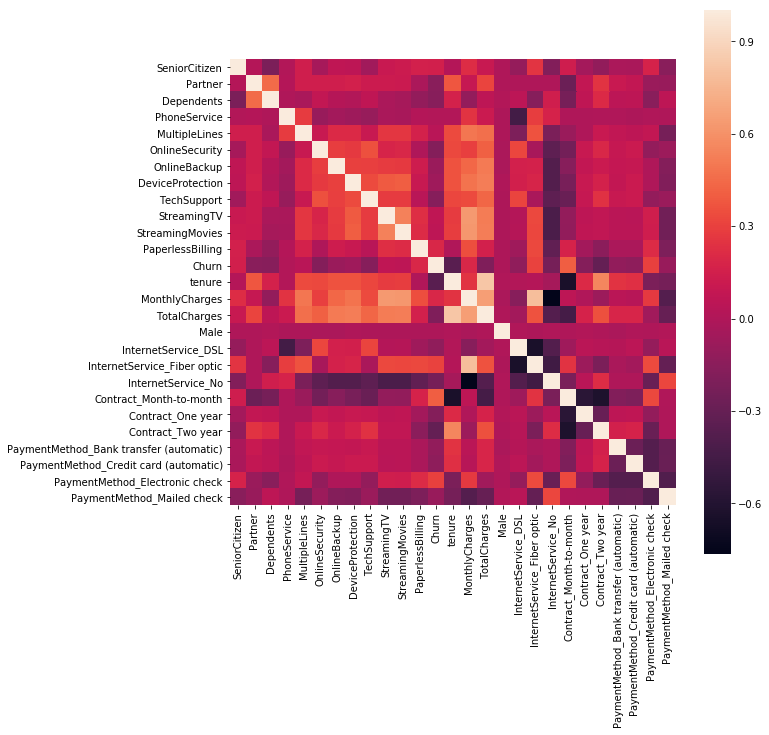

In [29]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, square = True, xticklabels=True, yticklabels=True)
plt.show()

In [30]:
# Checking for high correlation coefficients > 0.75
for i in cor.keys():
    for j in cor.keys():
        if cor[i][j] > 0.75 and cor[i][j] <1:
            print (cor[i][j], '=','cor('+i,',',j+')')

0.8261783979502412 = cor(tenure , TotalCharges)
0.7870655284726786 = cor(MonthlyCharges , InternetService_Fiber optic)
0.8261783979502412 = cor(TotalCharges , tenure)
0.7870655284726786 = cor(InternetService_Fiber optic , MonthlyCharges)


In [31]:
# For each of these variables with >0.75 with at least one other variable, we shall check if they have >0.6 cor with other variables
for i in ['tenure', 'TotalCharges', 'MonthlyCharges', 'InternetService_Fiber optic']:
    count = 0
    for j in cor.keys():
        if cor[j][i] > 0.6 and cor[j][i] <1:
            print (cor[i][j], '=','cor('+i,',',j+')')
            count +=1
    print(i, 'has a correlation coefficient >0.6 with',count,'other variables\n')

0.8261783979502412 = cor(tenure , TotalCharges)
tenure has a correlation coefficient >0.6 with 1 other variables

0.8261783979502412 = cor(TotalCharges , tenure)
0.651173831578781 = cor(TotalCharges , MonthlyCharges)
TotalCharges has a correlation coefficient >0.6 with 2 other variables

0.6296031609781194 = cor(MonthlyCharges , StreamingTV)
0.6274288843898838 = cor(MonthlyCharges , StreamingMovies)
0.651173831578781 = cor(MonthlyCharges , TotalCharges)
0.7870655284726786 = cor(MonthlyCharges , InternetService_Fiber optic)
MonthlyCharges has a correlation coefficient >0.6 with 4 other variables

0.7870655284726786 = cor(InternetService_Fiber optic , MonthlyCharges)
InternetService_Fiber optic has a correlation coefficient >0.6 with 1 other variables



In [32]:
# We shall remove TotalCharges and MonthlyCharges which are very dependent on other variables
features_list_old = features_list
features_list = df.columns.tolist()
features_list.remove('TotalCharges')
features_list.remove('MonthlyCharges')

In [33]:
# We removing irrelevant columns
features_list.remove('MonthlyCharges_group')
features_list.remove('TotalCharges_group')
for x in target_list: features_list.remove(x)
for x in id_list: features_list.remove(x)

In [34]:
features_list

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'tenure',
 'Male',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

## 4. Modelling

In [35]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
# Create a 5-fold cross validation
kf = KFold(n_splits = 5, shuffle=True, random_state = 12345)

In [37]:
# For saving cross validation accuracy and confusion matrices for the different models
cv = {}
cm = {}
cma = {}
coeffs = {}
fpr = {}
tpr = {}
roc_auc = {}

In [38]:
def prediction(model, model_name, feature_weights):
    print('##### Model',model_name,'#####')

    # Cross Validation
    cv[model_name] = cross_val_score(model, # Cross-validation on model
                             X, # Feature matrix
                             y, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
    print('Report Average Cross-Validation Accuracy of',model_name+':')
    print(np.mean(cv[model_name])*100, '%')

    # Fit the model on train data
    model.fit(X=X_train, y=y_train)

    # Predict outputs for test data
    y_pred = model.predict(X_test)

    # Create confusion matrix
    cm[model_name] = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix of',model_name)
    print(cm[model_name])
    cma[model_name] = accuracy_score(y_test, y_pred)
    print("Confusion Matrix Prediction Accuracy: ", cma[model_name]*100,'%')

    # ROC and AUC
    # Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
    # model.classes_
    score = model.predict_proba(X_test)[:, 1]

    # Plot ROC Curve
    fpr[model_name], tpr[model_name], thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
    roc_auc[model_name] = auc(fpr[model_name], tpr[model_name])

    plt.plot(fpr[model_name], tpr[model_name], label='AUC =coeff %0.2f'% roc_auc[model_name])
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.title('Receiver operating characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # Get feature weights
    if feature_weights:
        if feature_weights == "coeff":
            weights = pd.DataFrame(model.coef_[0])
        elif feature_weights == "features":
            weights = pd.DataFrame(model.feature_importances_)
        # Bagging method makes use of many decision trees
        elif feature_weights == "bagging":
            weights = np.mean([tree.feature_importances_ for tree in model.estimators_], axis = 0)
            weights = pd.DataFrame(weights)

        coeffs[model_name] = pd.merge(pd.DataFrame(model_features),weights, left_index=True, right_index=True, how='left')
        coeffs[model_name].columns = ['Feature', 'Weights']
        coeffs[model_name] = coeffs[model_name].sort_values(by = 'Weights')

        plt.barh(coeffs[model_name]['Feature'], coeffs[model_name]['Weights'])
        plt.title('Feature Weights')
        plt.show()

        coeffs[model_name] = coeffs[model_name].sort_values(by = 'Weights', ascending=False)
        print(coeffs[model_name])

In [39]:
def set_train_test(df, features_list, target_list):
    global X, y, X_train, X_test, y_train, y_test
    
    X = df[features_list]
    y = df[target_list[0]]

    # Do train-test split: 70% train and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4.1 Baseline Model: Logistic Regression

In [40]:
set_train_test(df, features_list, target_list)

In [41]:
# Logistic regression using L1-regularization
lr1 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l1', C=100, random_state=0)

# Logistic regression using L2-regularization
lr2 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=0)

model_features = features_list

##### Model L1 Logistic Regression #####
Report Average Cross-Validation Accuracy of L1 Logistic Regression:
80.22154655139042 %

Confusion Matrix of L1 Logistic Regression
[[1397  163]
 [ 255  298]]
Confusion Matrix Prediction Accuracy:  80.21769995267393 %


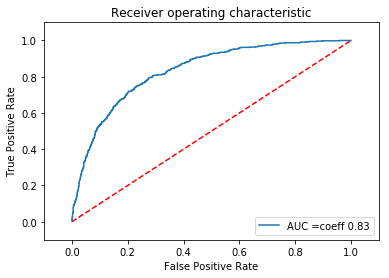

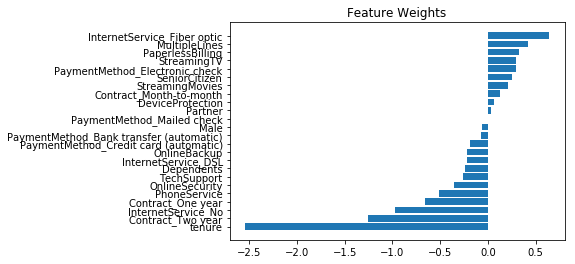

                                    Feature   Weights
15              InternetService_Fiber optic  0.643572
4                             MultipleLines  0.423616
11                         PaperlessBilling  0.327017
9                               StreamingTV  0.299220
22           PaymentMethod_Electronic check  0.290939
0                             SeniorCitizen  0.248530
10                          StreamingMovies  0.213752
17                  Contract_Month-to-month  0.131722
7                          DeviceProtection  0.060762
1                                   Partner  0.028859
23               PaymentMethod_Mailed check  0.000000
13                                     Male -0.064405
20  PaymentMethod_Bank transfer (automatic) -0.071219
21    PaymentMethod_Credit card (automatic) -0.186017
6                              OnlineBackup -0.215131
14                      InternetService_DSL -0.217806
2                                Dependents -0.239135
8                           

In [42]:
prediction(lr1, 'L1 Logistic Regression', 'coeff')

##### Model L2 Logistic Regression #####
Report Average Cross-Validation Accuracy of L2 Logistic Regression:
80.22154655139042 %

Confusion Matrix of L2 Logistic Regression
[[1397  163]
 [ 255  298]]
Confusion Matrix Prediction Accuracy:  80.21769995267393 %


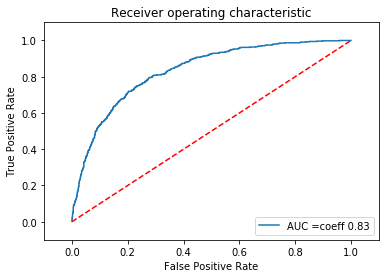

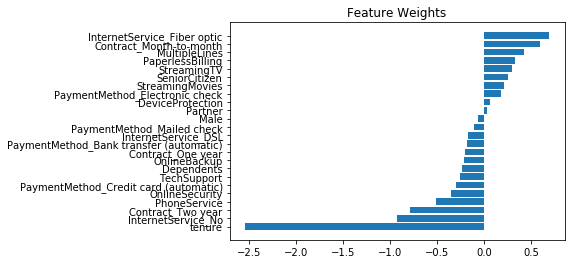

                                    Feature   Weights
15              InternetService_Fiber optic  0.690684
17                  Contract_Month-to-month  0.590125
4                             MultipleLines  0.423569
11                         PaperlessBilling  0.327068
9                               StreamingTV  0.299229
0                             SeniorCitizen  0.248537
10                          StreamingMovies  0.213759
22           PaymentMethod_Electronic check  0.180600
7                          DeviceProtection  0.060821
1                                   Partner  0.028905
13                                     Male -0.064455
23               PaymentMethod_Mailed check -0.110273
14                      InternetService_DSL -0.170639
20  PaymentMethod_Bank transfer (automatic) -0.181686
18                        Contract_One year -0.203776
6                              OnlineBackup -0.215263
2                                Dependents -0.239200
8                           

In [43]:
prediction(lr2, 'L2 Logistic Regression', 'coeff')

## Univariate feature selection

In [44]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [45]:
select = SelectKBest(score_func = chi2,k = 3)
fit    = select.fit(X,y)

In [46]:
score = pd.DataFrame({"features":features_list,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)
score

,features,scores,p_values
17,Contract_Month-to-month,519.895311,4.459832e-115
19,Contract_Two year,488.578090,2.905390e-108
22,PaymentMethod_Electronic check,426.422767,9.760677e-95
15,InternetService_Fiber optic,374.476216,1.984260e-83
16,InternetService_No,286.520193,2.849642e-64
12,tenure,226.096162,4.233851e-51
18,Contract_One year,176.123171,3.403606e-40
5,OnlineSecurity,147.295858,6.761696e-34
8,TechSupport,135.559783,2.490549e-31
0,SeniorCitizen,134.351545,4.576959e-31


In [47]:
# Function that determines features that give the highest cross validation accuracy
# for a particular model
def test_feature_number(model, scoredf):
    global score
    all_accuracies = []
    ranked_accuracies = [0,]
    ranked_index = [0,]
    
    score = scoredf.sort_values(by = 'scores' ,ascending =False)
    
    for i in range(len(score['features']))[1:]:
        set_train_test(df, list(score['features'][:i]), target_list)
        cv_new = cross_val_score(model, # Cross-validation on model
                                 X, # Feature matrix
                                 y, # Output vector
                                 cv=kf, # Cross-validation technique
                                 scoring='accuracy' # Model performance metrics: accuracy
                                )
        me = np.mean(cv_new)
        if me > ranked_accuracies[-1]:
            ranked_accuracies.append(me)
            ranked_index.append(i)
        all_accuracies.append(me)
    
    print('Table of Increasing Accuracies')
    tab = pd.DataFrame({'Number of Features':ranked_index,
                       'Average Cross Validation Accuracy':ranked_accuracies}).transpose()
    display(tab)
    
    plt.plot(all_accuracies)
    plt.title('Average Cross Validation Accuracy')
    plt.xlabel('Number of Features')
    plt.show()
    
    return max(ranked_index)

## 4.2 Improved Models: Ensemble Learning

In [48]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [49]:
# Model 1: Single decision tree model
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=12345)

# Model 2: Bagging method
bagging = BaggingClassifier(n_estimators=100, random_state=12345)

# Model 3: Random Forest method
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)

# Model 4: AdaBoosting method
Adaboost = AdaBoostClassifier(n_estimators=100, random_state=12345)

### 4.2.1 Method 1: Decision Tree Classifier

Table of Increasing Accuracies


,0,1,2,3,4
Number of Features,0.0,1.000000,3.000000,4.000000,6.000000
Average Cross Validation Accuracy,0.0,0.734632,0.754226,0.773109,0.774673


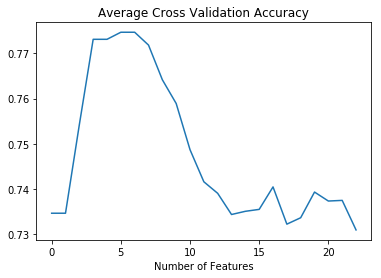

In [50]:
model = decision_tree
feature_number = test_feature_number(model, score)
model_features = list(score['features'][:feature_number])
set_train_test(df, model_features, target_list)

##### Model Decision Tree #####
Report Average Cross-Validation Accuracy of Decision Tree:
77.46725595199689 %

Confusion Matrix of Decision Tree
[[1359  201]
 [ 266  287]]
Confusion Matrix Prediction Accuracy:  77.89872219592996 %


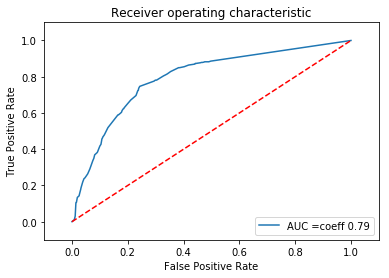

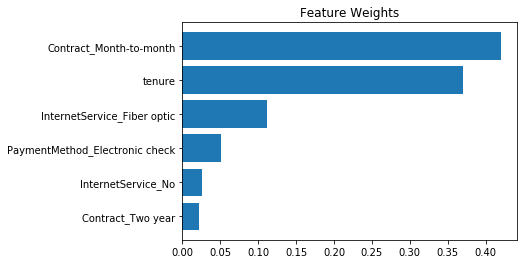

                          Feature   Weights
0         Contract_Month-to-month  0.420755
5                          tenure  0.369714
3     InternetService_Fiber optic  0.112206
2  PaymentMethod_Electronic check  0.050358
4              InternetService_No  0.025675
1               Contract_Two year  0.021293


In [51]:
# Model 1
prediction(decision_tree, 'Decision Tree', 'features')

In [52]:
# Plot the decision tree
import graphviz

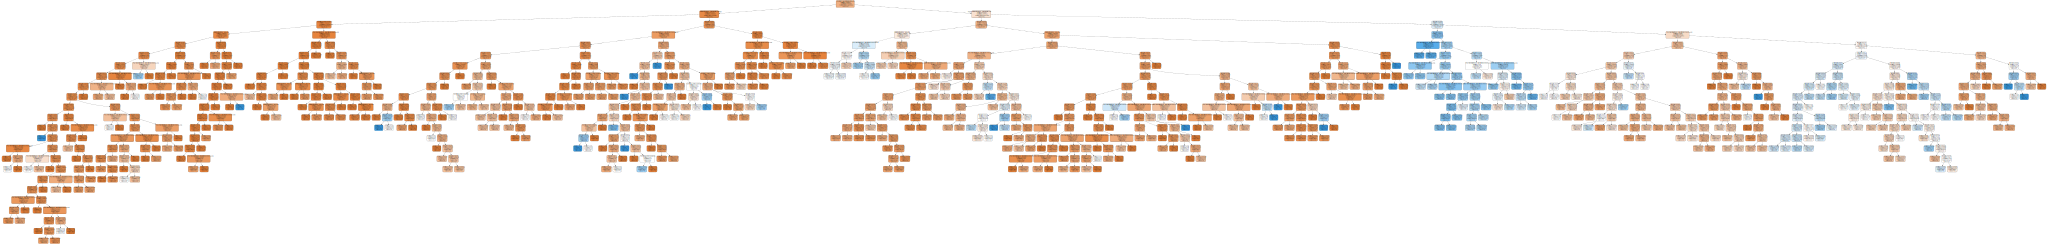

In [53]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, feature_names=model_features, class_names=target_list[0], 
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

In [78]:
# Store in .pdf 
graph.render("A0164651E_HW2_Decision Tree") 

'A0164651E_HW2_Decision Tree.pdf'

### 4.2.2 Method 2: Bootstrap Aggregating Classifier

Table of Increasing Accuracies


,0,1,2,3,4,5,6
Number of Features,0.0,1.000000,3.000000,4.000000,20.000000,21.000000,22.000000
Average Cross Validation Accuracy,0.0,0.734632,0.754226,0.773109,0.775096,0.776375,0.780917


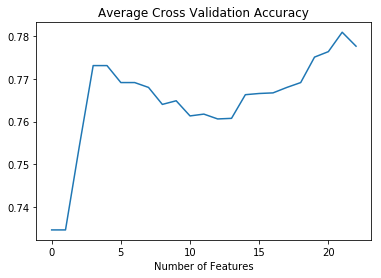

In [55]:
model = bagging
feature_number = test_feature_number(model, score)
model_features = list(score['features'][:feature_number])
set_train_test(df, model_features, target_list)

##### Model Bootstrap Aggregating #####
Report Average Cross-Validation Accuracy of Bootstrap Aggregating:
78.09172164333182 %

Confusion Matrix of Bootstrap Aggregating
[[1355  205]
 [ 282  271]]
Confusion Matrix Prediction Accuracy:  76.95220066256508 %


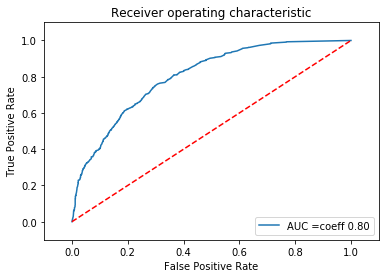

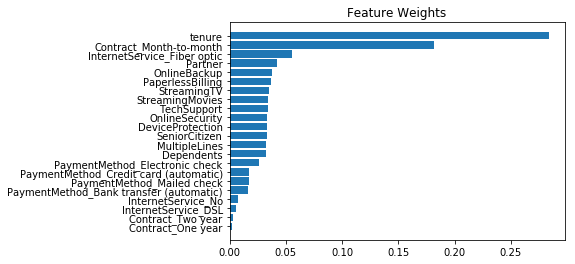

                                    Feature   Weights
5                                    tenure  0.283652
0                   Contract_Month-to-month  0.181869
3               InternetService_Fiber optic  0.055253
13                                  Partner  0.042459
17                             OnlineBackup  0.037479
11                         PaperlessBilling  0.037181
19                              StreamingTV  0.035333
20                          StreamingMovies  0.034359
8                               TechSupport  0.033785
7                            OnlineSecurity  0.033419
18                         DeviceProtection  0.033283
9                             SeniorCitizen  0.033121
21                            MultipleLines  0.032299
10                               Dependents  0.031932
2            PaymentMethod_Electronic check  0.026353
12    PaymentMethod_Credit card (automatic)  0.017232
16               PaymentMethod_Mailed check  0.016842
14  PaymentMethod_Bank trans

In [56]:
# Model 2
prediction(bagging,'Bootstrap Aggregating',"bagging")

### 4.2.3 Method 3: Random Forest Classifier

Table of Increasing Accuracies


,0,1,2,3,4,5,6,7
Number of Features,0.0,1.000000,3.000000,4.000000,20.000000,21.000000,22.000000,23.000000
Average Cross Validation Accuracy,0.0,0.734632,0.754226,0.773109,0.773393,0.777368,0.778929,0.779498


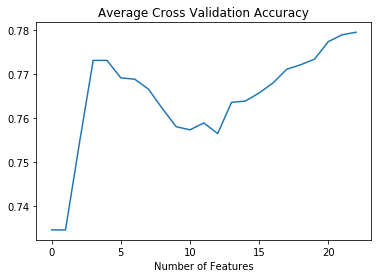

In [57]:
model = random_forest
feature_number = test_feature_number(model, score)
model_features = list(score['features'][:feature_number])
set_train_test(df, model_features, target_list)

##### Model Random Forest #####
Report Average Cross-Validation Accuracy of Random Forest:
77.94978708303762 %

Confusion Matrix of Random Forest
[[1379  181]
 [ 288  265]]
Confusion Matrix Prediction Accuracy:  77.80407004259347 %


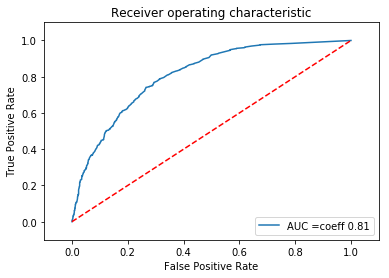

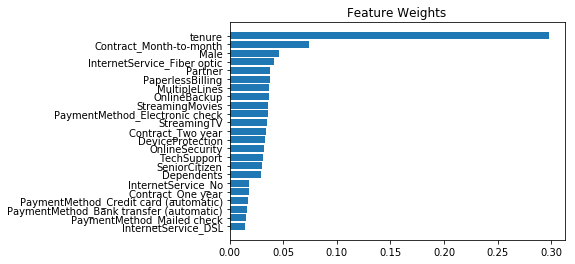

                                    Feature   Weights
5                                    tenure  0.297443
0                   Contract_Month-to-month  0.074359
22                                     Male  0.045632
3               InternetService_Fiber optic  0.041023
13                                  Partner  0.037527
11                         PaperlessBilling  0.037239
21                            MultipleLines  0.036676
17                             OnlineBackup  0.036481
20                          StreamingMovies  0.036187
2            PaymentMethod_Electronic check  0.035814
19                              StreamingTV  0.034567
1                         Contract_Two year  0.033709
18                         DeviceProtection  0.033395
7                            OnlineSecurity  0.032086
8                               TechSupport  0.031175
9                             SeniorCitizen  0.030451
10                               Dependents  0.029534
4                        Int

In [58]:
# Model 3
prediction(random_forest,'Random Forest',"features")

### 4.2.4 Method 4: AdaBoost Classifier

Table of Increasing Accuracies


,0,1,2,3,4,5,6,7,8
Number of Features,0.0,1.000000,3.000000,4.000000,6.000000,8.00000,12.000000,13.000000,22.000000
Average Cross Validation Accuracy,0.0,0.734632,0.754226,0.773109,0.793982,0.79597,0.799945,0.800797,0.801506


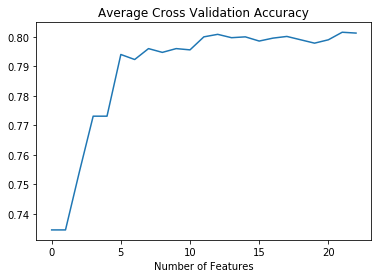

In [59]:
model = Adaboost
feature_number = test_feature_number(model, score)
model_features = list(score['features'][:feature_number])
set_train_test(df, model_features, target_list)

##### Model AdaBoost #####
Report Average Cross-Validation Accuracy of AdaBoost:
80.15055406800438 %

Confusion Matrix of AdaBoost
[[1400  160]
 [ 250  303]]
Confusion Matrix Prediction Accuracy:  80.59630856601989 %


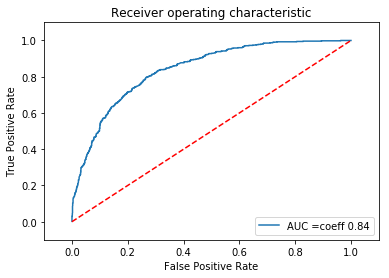

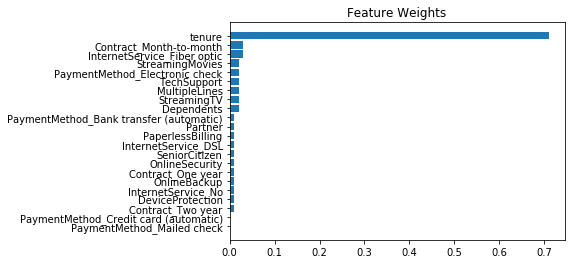

                                    Feature  Weights
5                                    tenure     0.71
0                   Contract_Month-to-month     0.03
3               InternetService_Fiber optic     0.03
20                          StreamingMovies     0.02
2            PaymentMethod_Electronic check     0.02
8                               TechSupport     0.02
21                            MultipleLines     0.02
19                              StreamingTV     0.02
10                               Dependents     0.02
14  PaymentMethod_Bank transfer (automatic)     0.01
13                                  Partner     0.01
11                         PaperlessBilling     0.01
15                      InternetService_DSL     0.01
9                             SeniorCitizen     0.01
7                            OnlineSecurity     0.01
6                         Contract_One year     0.01
17                             OnlineBackup     0.01
4                        InternetService_No   

In [60]:
# Model 4
prediction(Adaboost,'AdaBoost',"features")

### 4.2.5 Method 5: KNN Classifier

In [61]:
# Number of samples in train data set
print('Number of training samples =', X_train.shape[0])
print('Square root of number of training samples', X_train.shape[0]**0.5)

Number of training samples = 4930
Square root of number of training samples 70.21395872616783


We shall search up to 80 as the optimum number of neighbours should lie close to the square root of the total number of samples in the train data set. 
Furthermore, an odd number is preferred when choosing values of k. 
In addition, k should not be too small or big a number, guarding against overfitting and bias respectively.

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
l = [0,]
a = [0,]
for i in range(80)[1:]:
    knn = KNeighborsClassifier(algorithm='auto', n_neighbors=i)
    cv_knn = cross_val_score(knn, # Cross-validation on model
                             X, # Feature matrix
                             y, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
    me = np.mean(cv_knn)
    if me > max(l):
        l.append(me)
        a.append(i)
print(l)
print(a)

[0, 0.715603627653397, 0.74982216594619, 0.7621743741531712, 0.769698851538809, 0.774101958190851, 0.7746696359442544, 0.7766565584876444, 0.7793560270017421, 0.7807754734176398, 0.7824788091167172, 0.783615071940125, 0.7836152735660366, 0.7848930777792116, 0.7860291389767082, 0.7873065399380605, 0.7884435084521583, 0.7897207077875993, 0.7901474490289696, 0.7908568697980515, 0.7917087392735015, 0.79170924333828, 0.7918509863539585, 0.7919927293696368, 0.7939800551648494, 0.7942640452609846]
[0, 1, 2, 4, 6, 8, 9, 10, 12, 14, 15, 16, 26, 28, 30, 35, 38, 46, 52, 58, 60, 65, 72, 76, 77, 78]


As the largest few numbers are even numbers, which are non ideal for knn classification, we shall run the search again, this time for odd numbers only

In [64]:
l = [0,]
a = [0,]
for i in range(80)[1:]:
    knn = KNeighborsClassifier(algorithm='auto', n_neighbors=i)
    cv_knn = cross_val_score(knn, # Cross-validation on model
                             X, # Feature matrix
                             y, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
    me = np.mean(cv_knn)
    if me > max(l) and i%2:
        l.append(me)
        a.append(i)
print(l)
print(a)

[0, 0.715603627653397, 0.7461300930705207, 0.7573458368281824, 0.7694167768888315, 0.7746696359442544, 0.7760899896767535, 0.7824788091167172, 0.7830458819923866, 0.7841831529453513, 0.7850342159171559, 0.7873065399380605, 0.7878747217562423, 0.7884434076392026, 0.7890113878314728, 0.79000479869669, 0.790714824343506, 0.7912833086005548, 0.79170924333828, 0.7918505831021356, 0.7939800551648494]
[0, 1, 3, 5, 7, 9, 11, 15, 17, 29, 31, 35, 43, 47, 53, 55, 59, 61, 65, 75, 77]


In [65]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=max(a))

##### Model Kth Nearest Neighbours #####
Report Average Cross-Validation Accuracy of Kth Nearest Neighbours:
79.39800551648494 %

Confusion Matrix of Kth Nearest Neighbours
[[1349  211]
 [ 237  316]]
Confusion Matrix Prediction Accuracy:  78.7979176526266 %


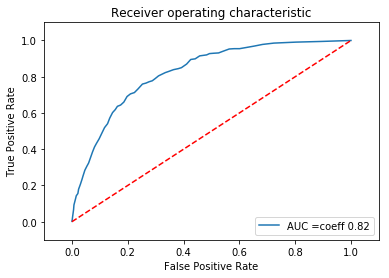

In [66]:
prediction(knn,'Kth Nearest Neighbours',None)

## 5. Model Results

### 5.1 Confusion Matrices

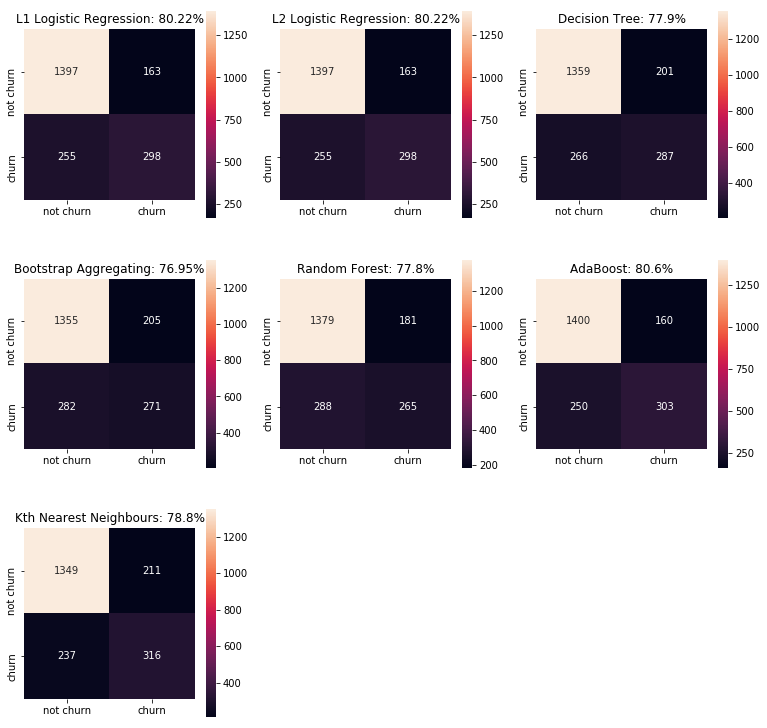

In [67]:
# Confusion matrices
plt.figure(figsize = (13,13))
i = 1
for x in cm:
    plt.subplot(3,3,i)
    sns.heatmap(cm[x], square=True, annot=True, fmt='d',
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"])
    acc = round(cma[x]*100, 2)
    plt.title(x+': '+str(acc)+'%')
    i+=1
plt.show()

### 5.2 Cross-Validation Accuracy

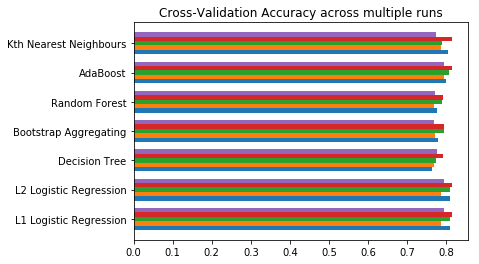

In [68]:
fig, ax = plt.subplots()
n = np.arange(len(cv))
width = 0.15
for i in range(len(cv['L2 Logistic Regression'])):
    ax.barh(n+i*width, [x[i] for x in list(cv.values())], width)
ax.set_yticks(n + (len(cv['L2 Logistic Regression'])-1)* width/2)
ax.set_yticklabels(list(cv.keys()))
plt.title('Cross-Validation Accuracy across multiple runs')
plt.show()

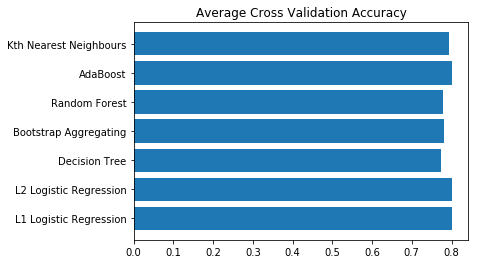

,Model,Average Cross Validation Accuracy,Confusion Matrix Accuracy
Model,,,
L1 Logistic Regression,L1 Logistic Regression,0.802215,0.802177
L2 Logistic Regression,L2 Logistic Regression,0.802215,0.802177
Decision Tree,Decision Tree,0.774673,0.778987
Bootstrap Aggregating,Bootstrap Aggregating,0.780917,0.769522
Random Forest,Random Forest,0.779498,0.778041
AdaBoost,AdaBoost,0.801506,0.805963
Kth Nearest Neighbours,Kth Nearest Neighbours,0.793980,0.787979


In [69]:
# Average Cross-Validation Accuracy
cv_ave = pd.DataFrame({'Model': list(cv.keys()),
                      'Average Cross Validation Accuracy': np.mean(list(cv.values()), axis=1),
                      'Confusion Matrix Accuracy': list(cma.values())})
keys = pd.DataFrame(list(cv.keys()))
cv_ave = cv_ave.set_index('Model', drop=False)
plt.barh(cv_ave['Model'], cv_ave['Average Cross Validation Accuracy'])
plt.title('Average Cross Validation Accuracy')
plt.show()
display(cv_ave)

### 5.3 ROC Curves

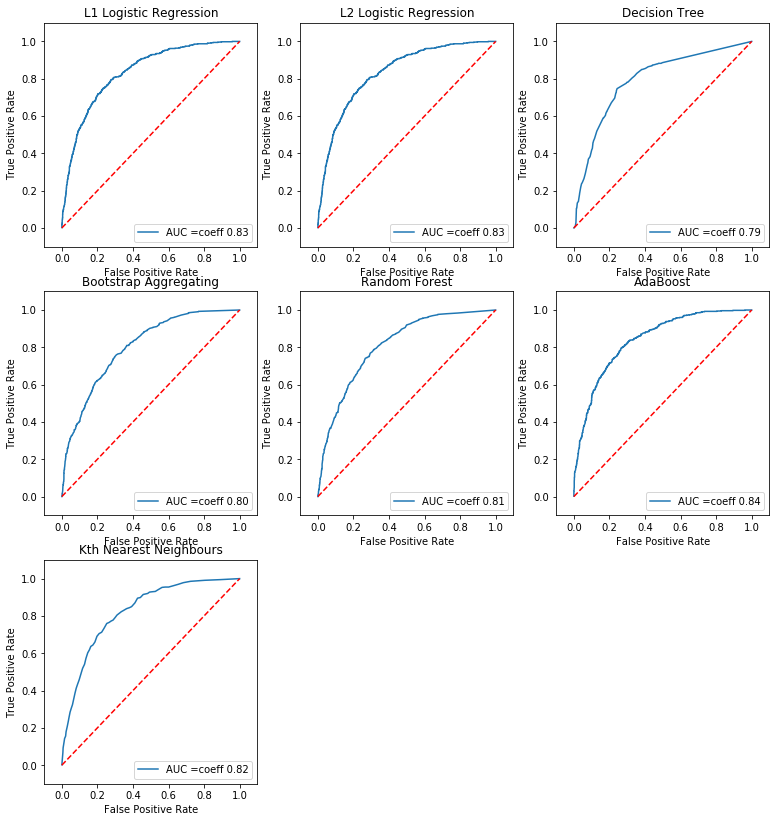

In [70]:
plt.figure(figsize = (13,14))
i = 1
for model_name in keys[0]:
    plt.subplot(3,3,i)
    
    plt.plot(fpr[model_name], tpr[model_name], label='AUC =coeff %0.2f'% roc_auc[model_name])
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.title(model_name)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    i+=1
plt.show()

### 5.4 Overall Coefficient Weights

In [71]:
keys1 = list(keys[0])
keys1 = [i for i in keys1 if i not in ['Kth Nearest Neighbours', 'L1 Logistic Regression']]

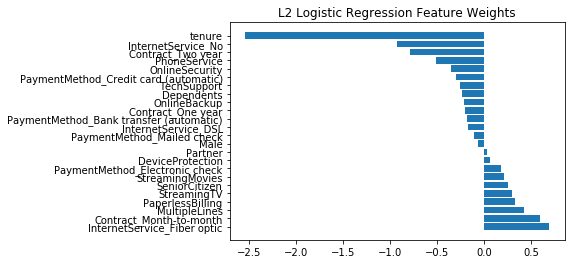

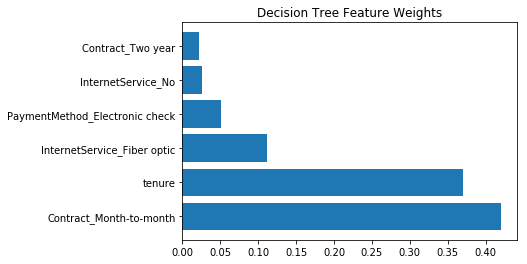

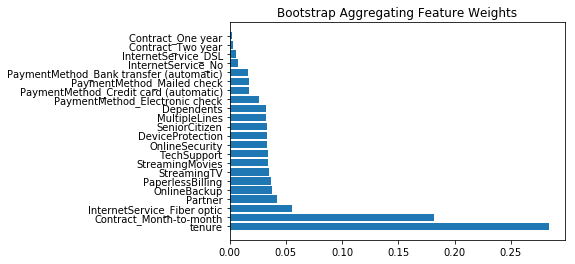

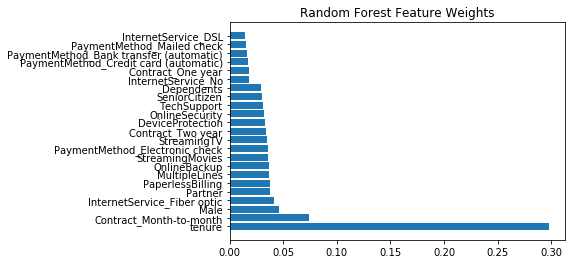

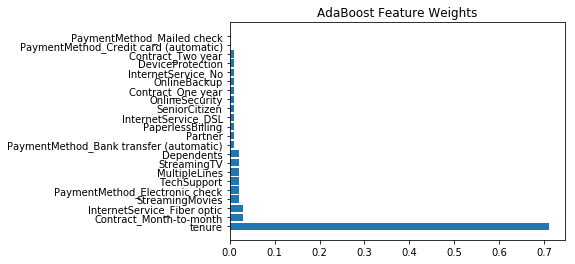

In [72]:
for model_name in keys1:
    plt.barh(coeffs[model_name]['Feature'], coeffs[model_name]['Weights'])
    plt.title(model_name +' Feature Weights')
    plt.show()

We shall apply the following steps to obtain the final Feature Weights from the 7 models:
1. Square all the Feature Weights to account for negative values
2. Scale all the Feature Weights with a scaler so feature weights across models are given the same weightage
2. Multiply resulting Feature Weights by the Model's Average Cross-Validation Accuracy to get the weighted Feature weight based on how accurate each model is
3. Sum the weights from all the models

These feature weights are relative to each other.

In [73]:
import copy
coeffs_new = copy.deepcopy(coeffs)

In [74]:
for model in coeffs_new:
    coeffs_new[model] = coeffs_new[model].sort_values(by = 'Feature')
    coeffs_new[model]['Weights'] = coeffs_new[model]['Weights'].map(lambda x: x**2)
    
    # Scaler does not play well with data containing NaN, thus we shall scale the weights manually
    small = coeffs_new[model]['Weights'].min()
    big = coeffs_new[model]['Weights'].max()
    coeffs_new[model]['Weights'] = coeffs_new[model]['Weights'].\
    map(lambda x: (x-small) / (big-small))
    
    coeffs_new[model]['Weights'] = coeffs_new[model]['Weights'].\
    map(lambda x: x * (cv_ave.loc[model, 'Average Cross Validation Accuracy']))

coeffs_new['total'] = copy.deepcopy(coeffs_new['L1 Logistic Regression'])
coeffs_new['total']['Weights'] = 0
coeffs_new['total'].index = list(coeffs_new['total']['Feature'])

In [75]:
for feature in list(coeffs_new['total']['Feature']):
    for model in keys1:
        if feature in list(coeffs_new[model]['Feature']):
            weight = float(coeffs_new[model][coeffs_new[model]['Feature']==feature]['Weights'])
            coeffs_new['total'].loc[feature, 'Weights'] += weight

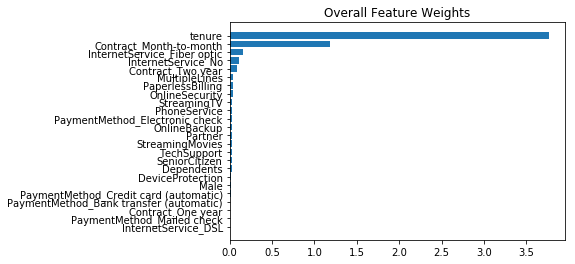

                                    Feature   Weights
0                                    tenure  3.761807
1                   Contract_Month-to-month  1.187224
2               InternetService_Fiber optic  0.156350
3                        InternetService_No  0.109016
4                         Contract_Two year  0.086458
5                             MultipleLines  0.042987
6                          PaperlessBilling  0.037205
7                            OnlineSecurity  0.033493
8                               StreamingTV  0.032530
9                              PhoneService  0.032372
10           PaymentMethod_Electronic check  0.030020
11                             OnlineBackup  0.029424
12                                  Partner  0.028340
13                          StreamingMovies  0.027457
14                              TechSupport  0.026797
15                            SeniorCitizen  0.024784
16                               Dependents  0.023460
17                         D

In [76]:
coeffs_new['total'] = coeffs_new['total'].sort_values(by = 'Weights')

plt.barh(coeffs_new['total']['Feature'], coeffs_new['total']['Weights'])
plt.title('Overall' +' Feature Weights')
plt.show()

coeffs_new['total'] = coeffs_new['total'].sort_values(by = 'Weights', ascending=False)
coeffs_new['total'].index = range(24)
print(coeffs_new['total'])